# KMeans on wine dataset

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 


In [2]:
# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

In [3]:
# reading the CSV file into pandas dataframe
wine_data = pd.read_csv("winequality-red.csv") 

In [4]:
# Check top few records to get a feel of the data structure
wine_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine_data.describe().transpose()     # horsepower is missing

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile_acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric_acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual_sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free_sulfur_dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total_sulfur_dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [6]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed_acidity           1599 non-null float64
volatile_acidity        1599 non-null float64
citric_acid             1599 non-null float64
residual_sugar          1599 non-null float64
chlorides               1599 non-null float64
free_sulfur_dioxide     1599 non-null float64
total_sulfur_dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


##  Let us do a pair plot analysis to visually check number of likely clusters

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


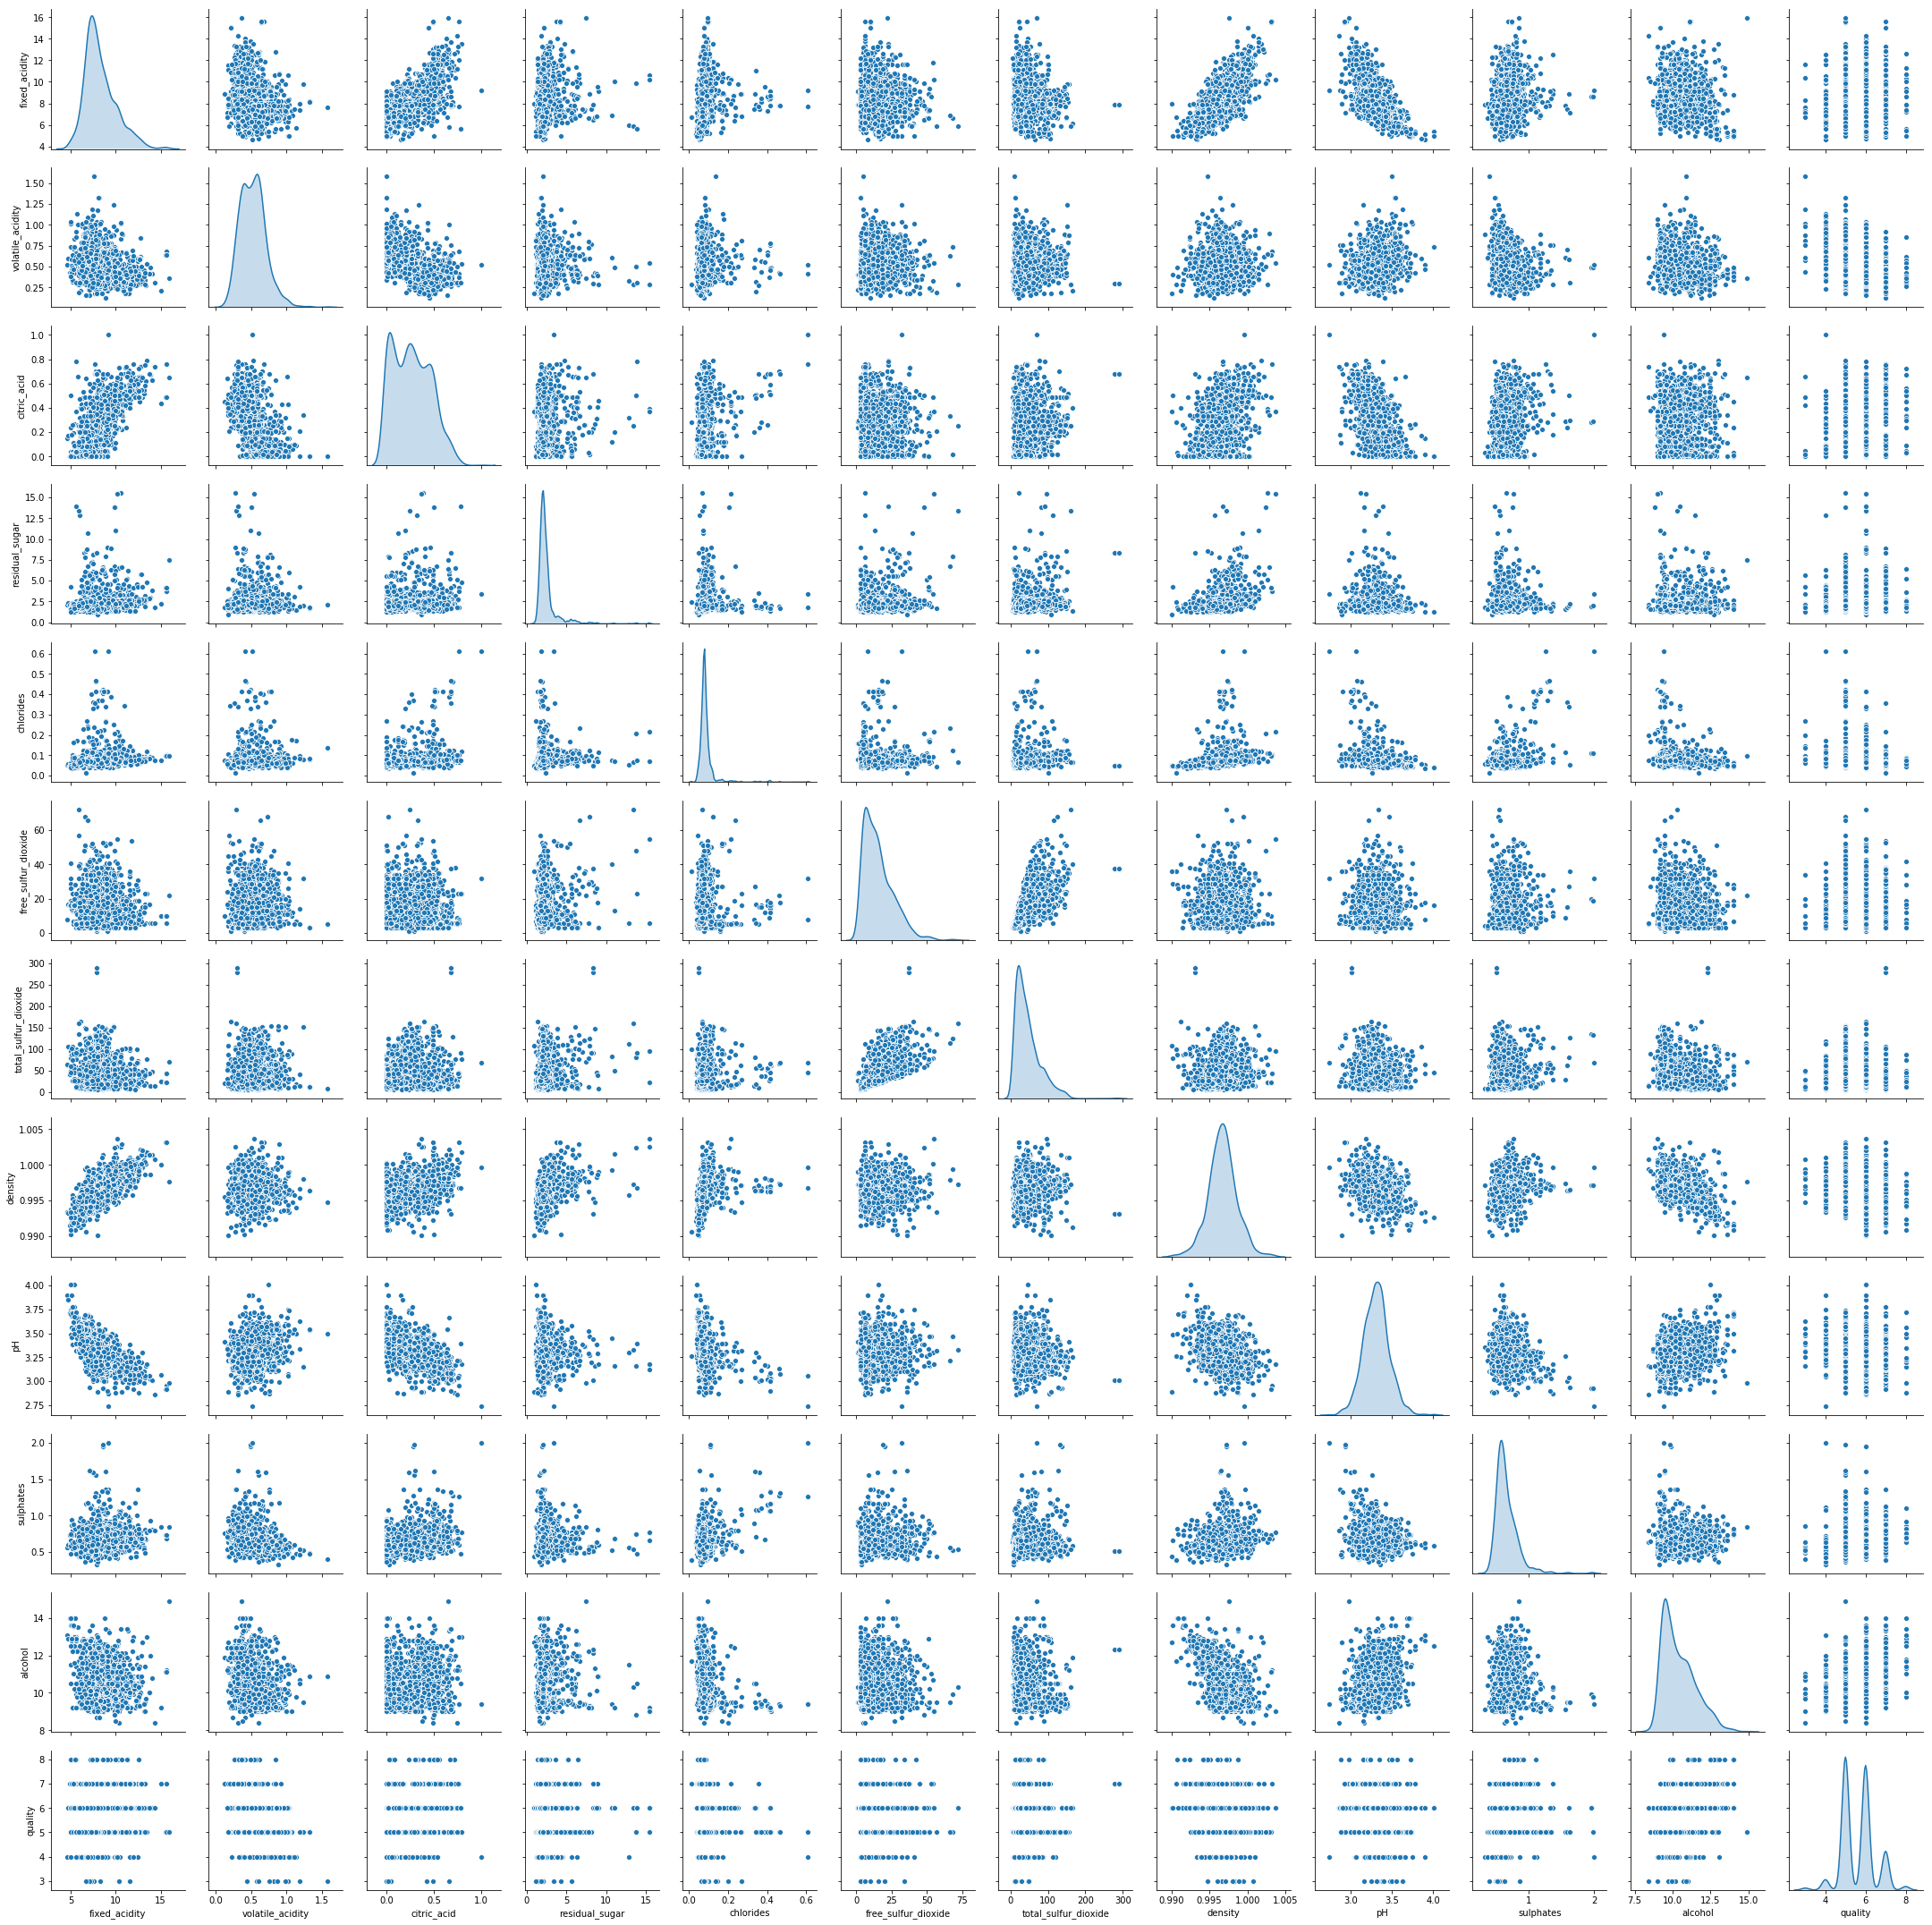

In [7]:

sns.pairplot(wine_data, diag_kind='kde')   # to plot density curve instead of histogram



In [7]:
from scipy.stats import zscore

wine_data_z = wine_data.apply(zscore)

In [16]:
from sklearn.decomposition import PCA
pca = PCA()
wine_data_z = pd.DataFrame(pca.fit_transform(wine_data_z))

# KMeans Clustering

In [17]:
cluster_range = range(1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(wine_data_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,19188.000000
1,2,15779.439511
2,3,14035.528125
3,4,12669.709990
4,5,11357.491473
5,6,10605.074972
6,7,9823.836757
7,8,9447.359299
8,9,9078.642925


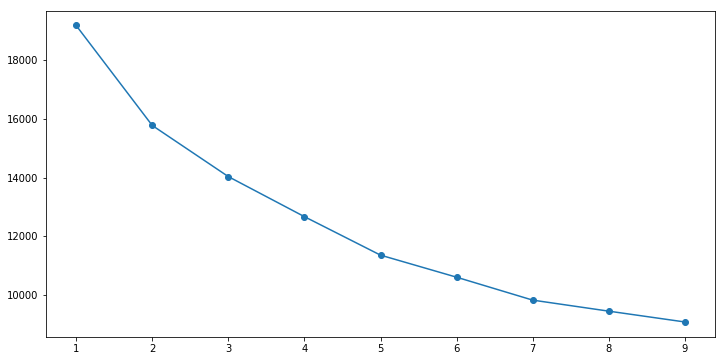

In [18]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [19]:
# The elbow plot confirms our visual analysis that there are likely 3 or 4 good clusters
# Let us start with 3 clusters

In [20]:
cluster = KMeans( n_clusters = 6, random_state = 2354 )
cluster.fit(wine_data_z)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=2354, tol=0.0001, verbose=0)

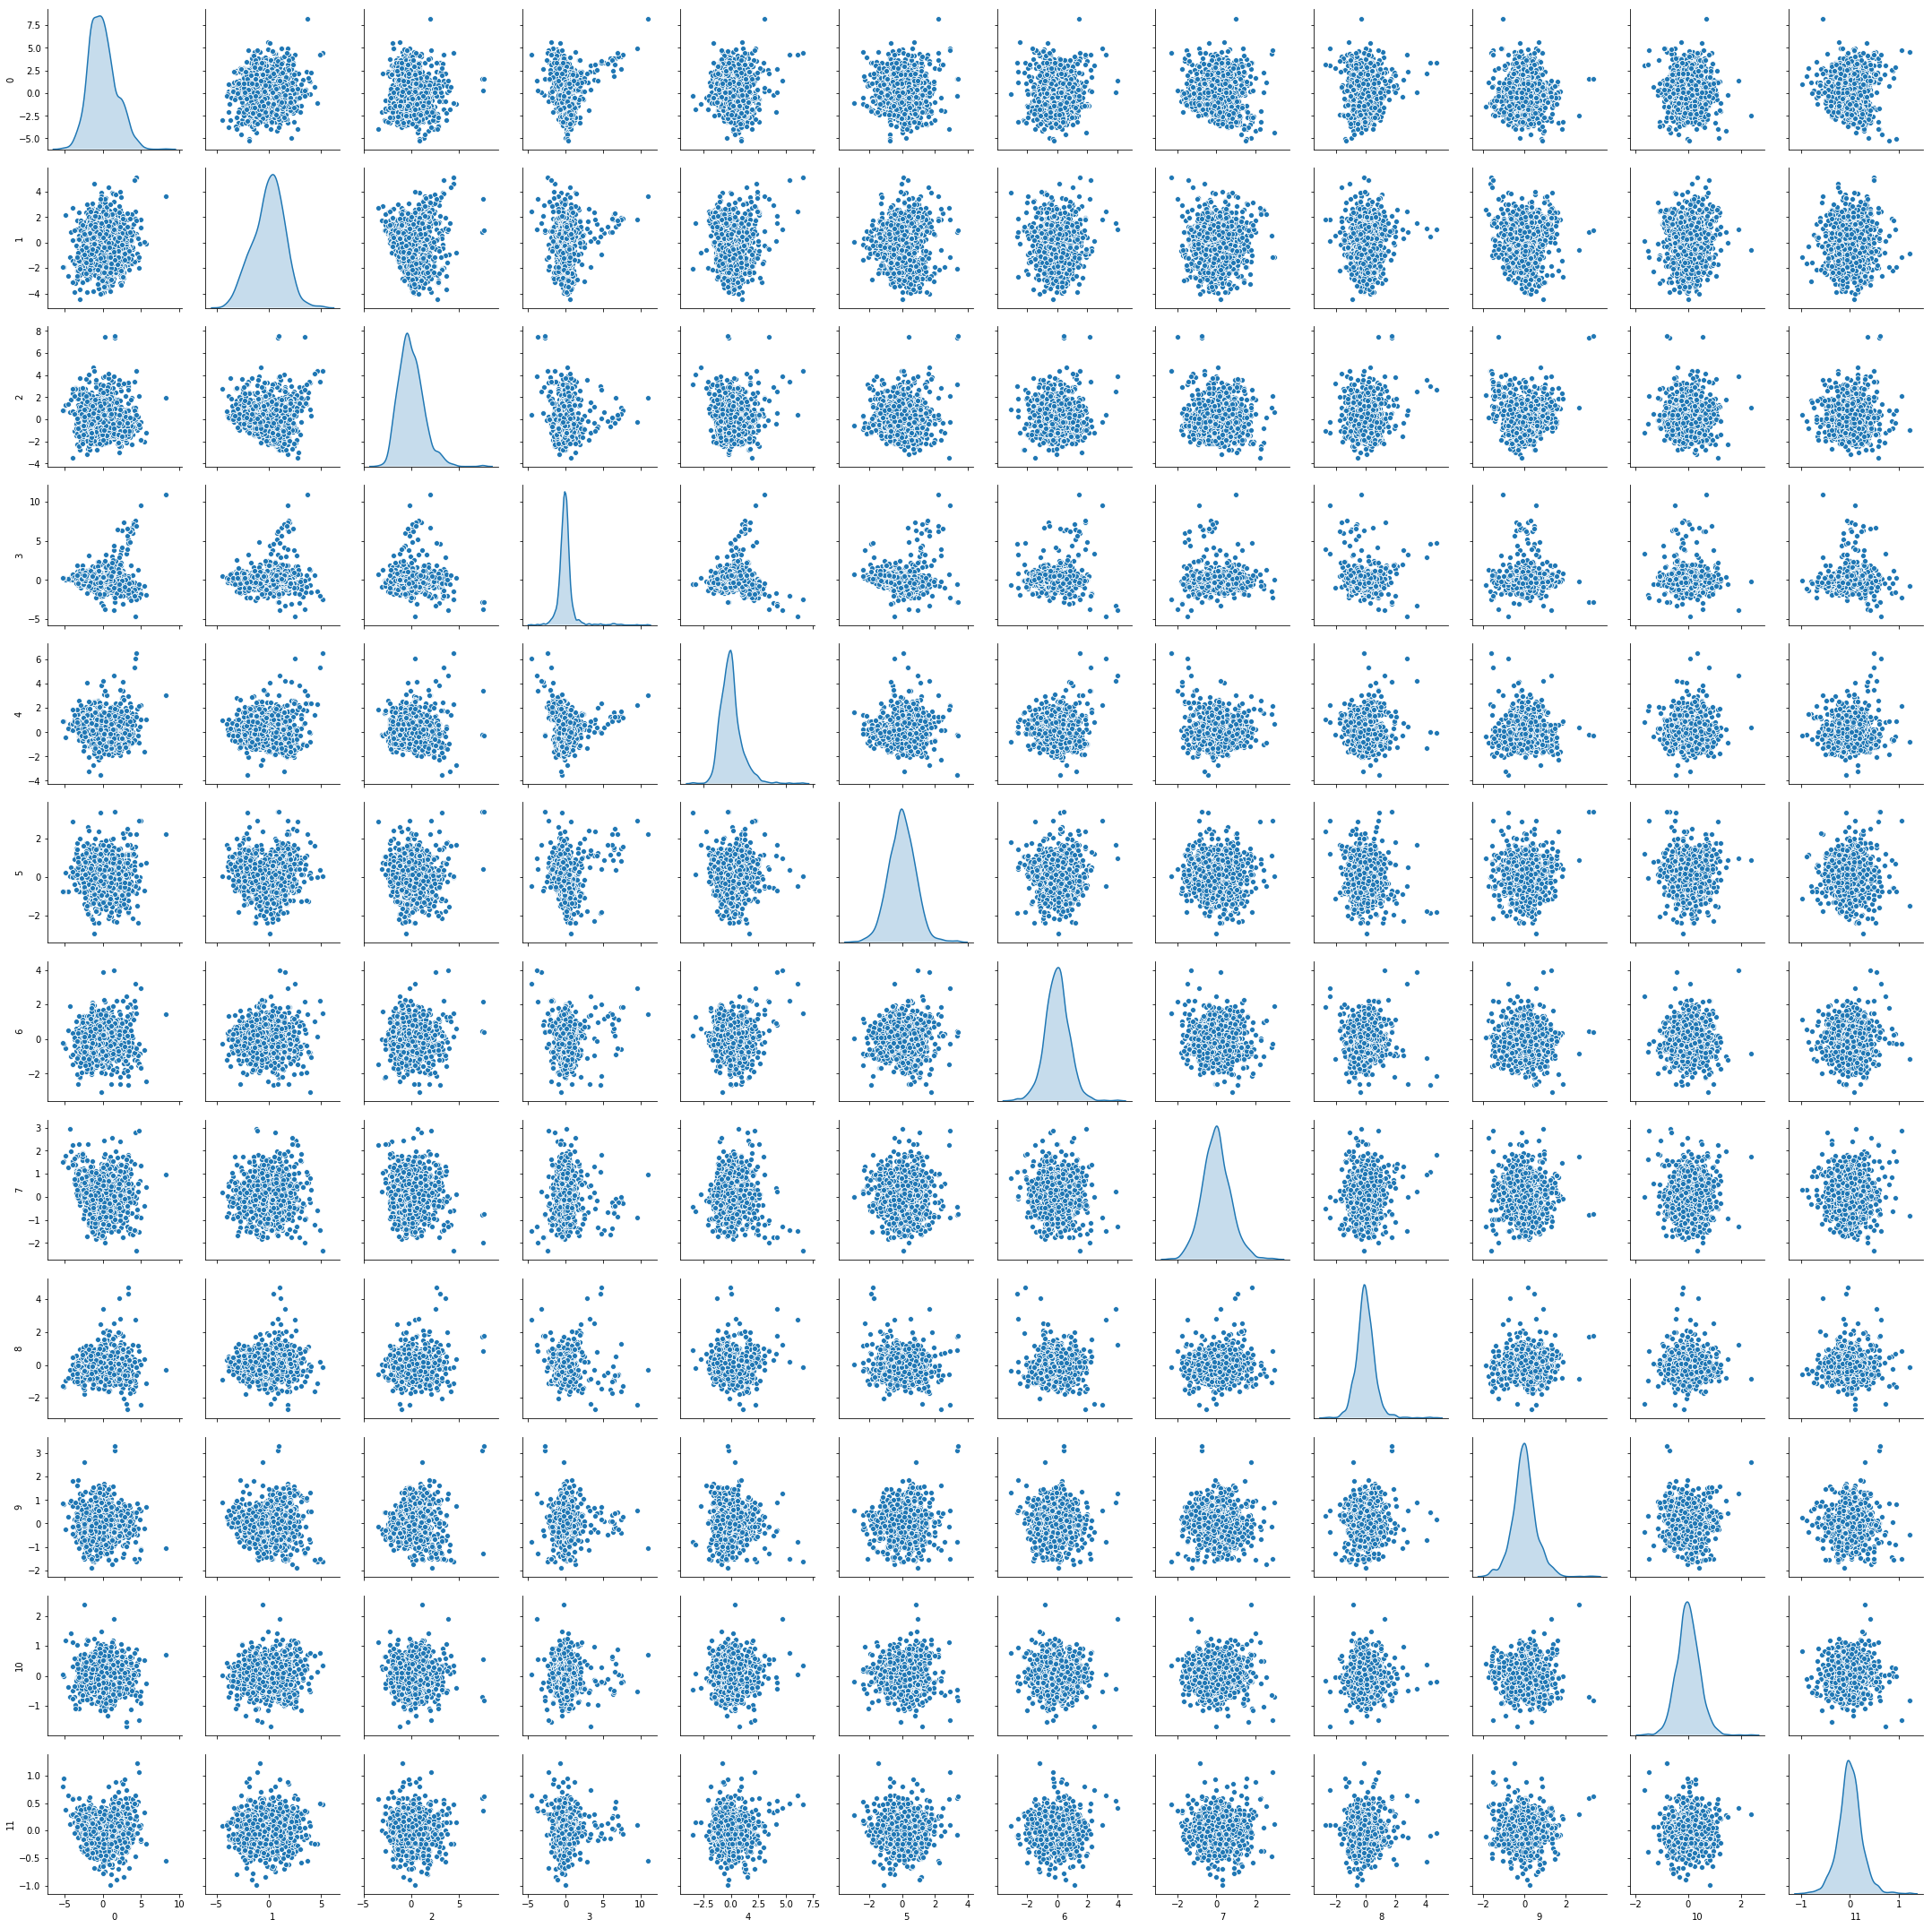

In [21]:
sns.pairplot(wine_data_z, diag_kind='kde')   

In [22]:
centroids = cluster.cluster_centers_
centroids

array([[ 2.22220596e+00, -7.39450609e-01, -5.56392750e-01,
        -4.06318146e-01, -4.15787119e-02, -5.63301133e-02,
        -8.12045883e-02,  1.88369071e-01, -7.25696476e-02,
        -3.59333044e-02, -9.10078720e-03,  2.51631797e-02],
       [-1.18258023e+00,  4.49317481e-01, -9.43741506e-01,
         8.62894364e-02,  1.65648947e-01, -1.07820175e-01,
        -2.46328669e-02, -1.17313295e-01,  6.58051199e-02,
        -2.68963186e-02,  8.43731271e-04, -6.50280193e-03],
       [ 4.37871875e-02,  1.33566832e+00,  8.99897077e-01,
        -1.58993416e-01, -6.64409662e-01, -2.87682956e-02,
        -2.09309297e-02,  5.25593701e-02, -8.28356890e-02,
         1.53547323e-01, -2.22064671e-02, -3.65009591e-02],
       [ 1.45180421e+00,  2.51434442e+00,  2.93835605e+00,
        -2.04213618e+00,  2.96482779e+00,  3.10985911e-01,
         1.04584675e+00, -8.51858408e-01,  7.06275746e-01,
        -1.10036367e-01,  2.88624040e-01,  1.79369970e-01],
       [-9.62650954e-01, -1.76506002e+00,  8.5239803

In [23]:
centroid_df = pd.DataFrame(centroids, columns = list(wine_data_z) )
centroid_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,2.222206,-0.739451,-0.556393,-0.406318,-0.041579,-0.056330,-0.081205,0.188369,-0.072570,-0.035933,-0.009101,0.025163
1,-1.182580,0.449317,-0.943742,0.086289,0.165649,-0.107820,-0.024633,-0.117313,0.065805,-0.026896,0.000844,-0.006503
2,0.043787,1.335668,0.899897,-0.158993,-0.664410,-0.028768,-0.020931,0.052559,-0.082836,0.153547,-0.022206,-0.036501
3,1.451804,2.514344,2.938356,-2.042136,2.964828,0.310986,1.045847,-0.851858,0.706276,-0.110036,0.288624,0.179370
4,-0.962651,-1.765060,0.852398,0.164364,0.068965,0.139161,-0.002003,0.052114,-0.003015,-0.078838,0.013325,-0.003956
5,3.472449,1.416725,0.454416,5.954341,1.115134,1.123445,0.480260,-0.319356,-0.155389,0.109794,-0.134200,0.084106


In [24]:
prediction=cluster.predict(wine_data_z)
wine_data_z["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

# Instead of interpreting the neumerical values of the centroids, let us do a visual analysis by converting the 
# centroids and the data in the cluster into box plots.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002410D0A2940>,
      dtype=object)

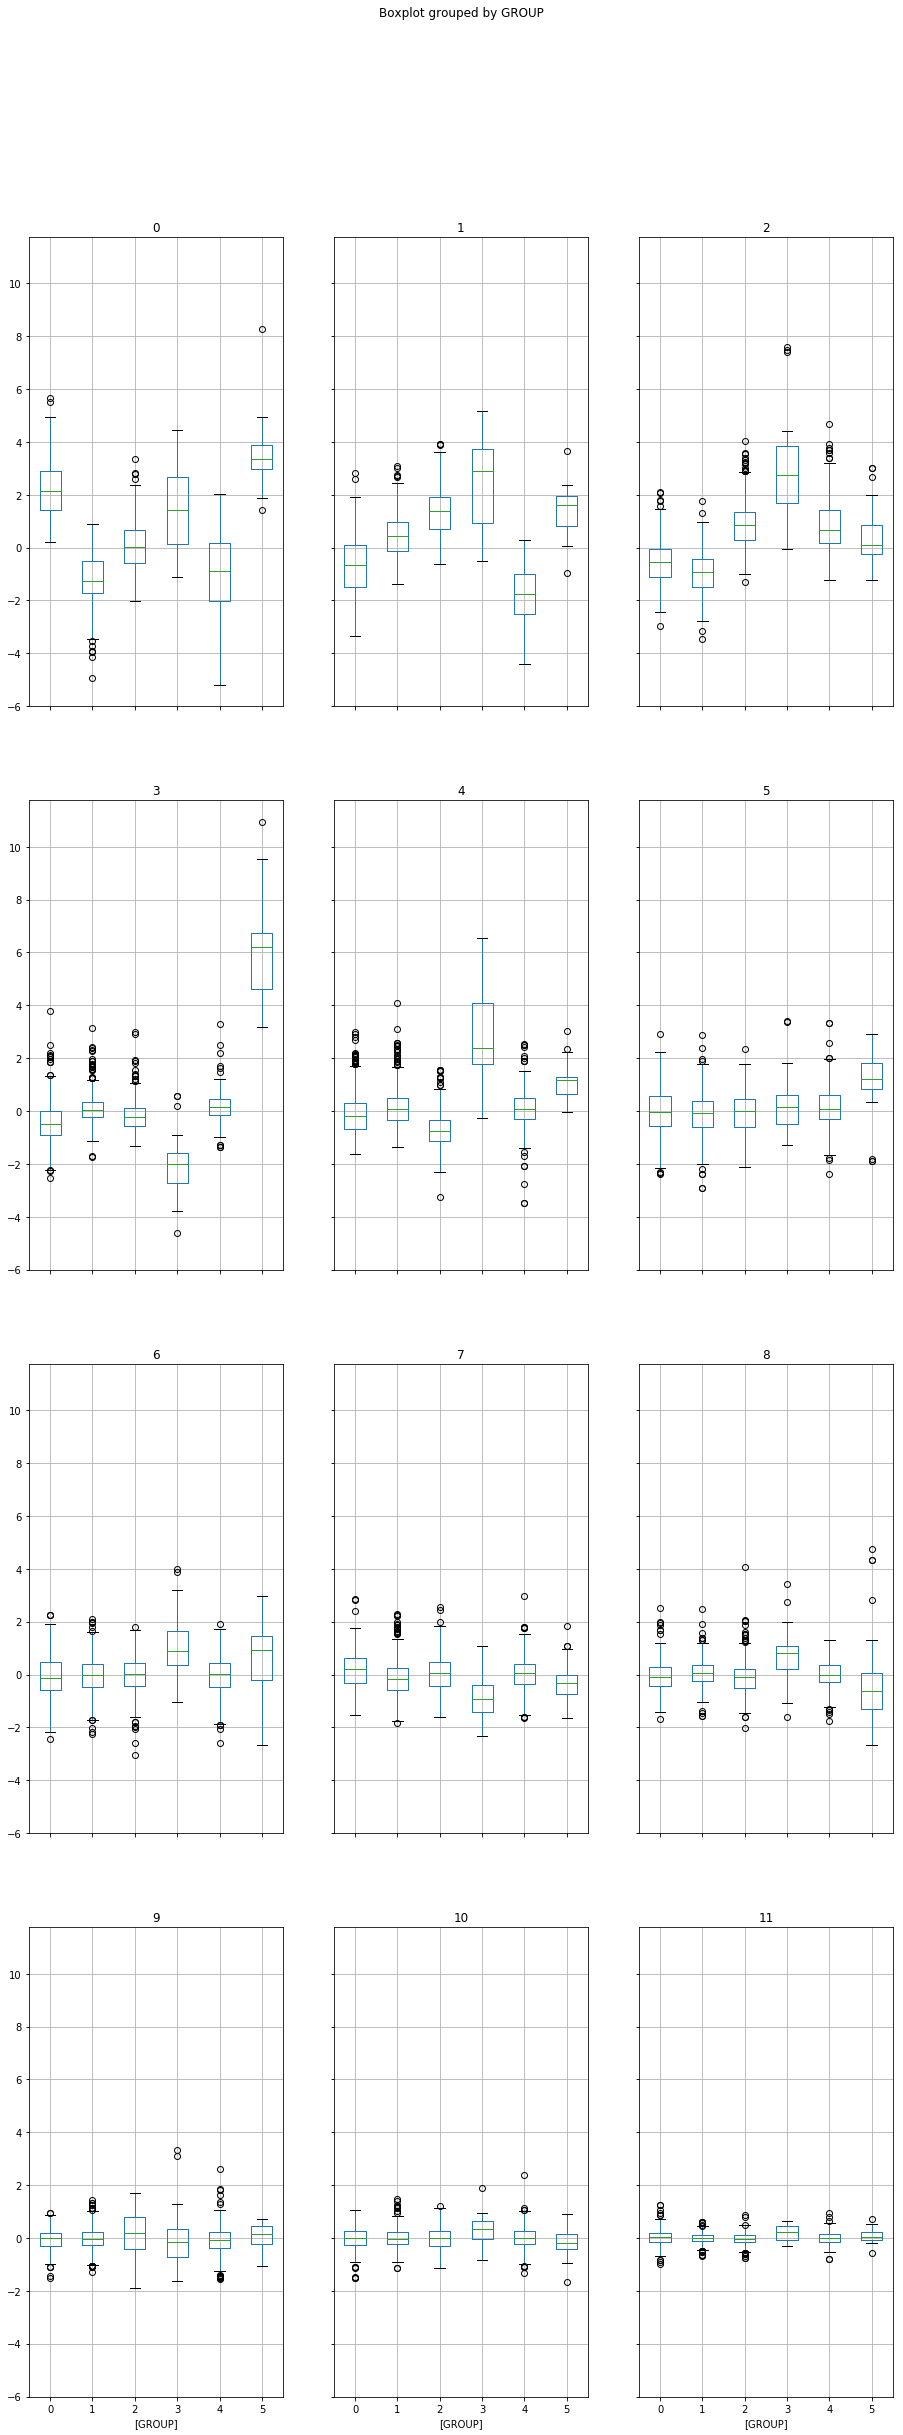

In [25]:
import matplotlib.pylab as plt

wine_data_z.boxplot(by = 'GROUP',  layout=(4,3), figsize=(15, 40))



In [26]:
# There are many outliers on each dimension  (indicated by the black circles)
# Spread of data on each dimension (indivated by the whiskers is long ... due to the outliers)
# If the outliers are addressed, the clusters will overlap much less than right now (except in year dimension which has no outlier)


## Identifying and handling outliers



In [27]:
# Addressing outliers at group level

data = wine_data_z   # lazy to type long names. Renaming it to data. Remember data is not a copy of the dataframe
       
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()       
    return group

data_corrected = (data.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(wine_data_z['GROUP']))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024110E264E0>,
      dtype=object)

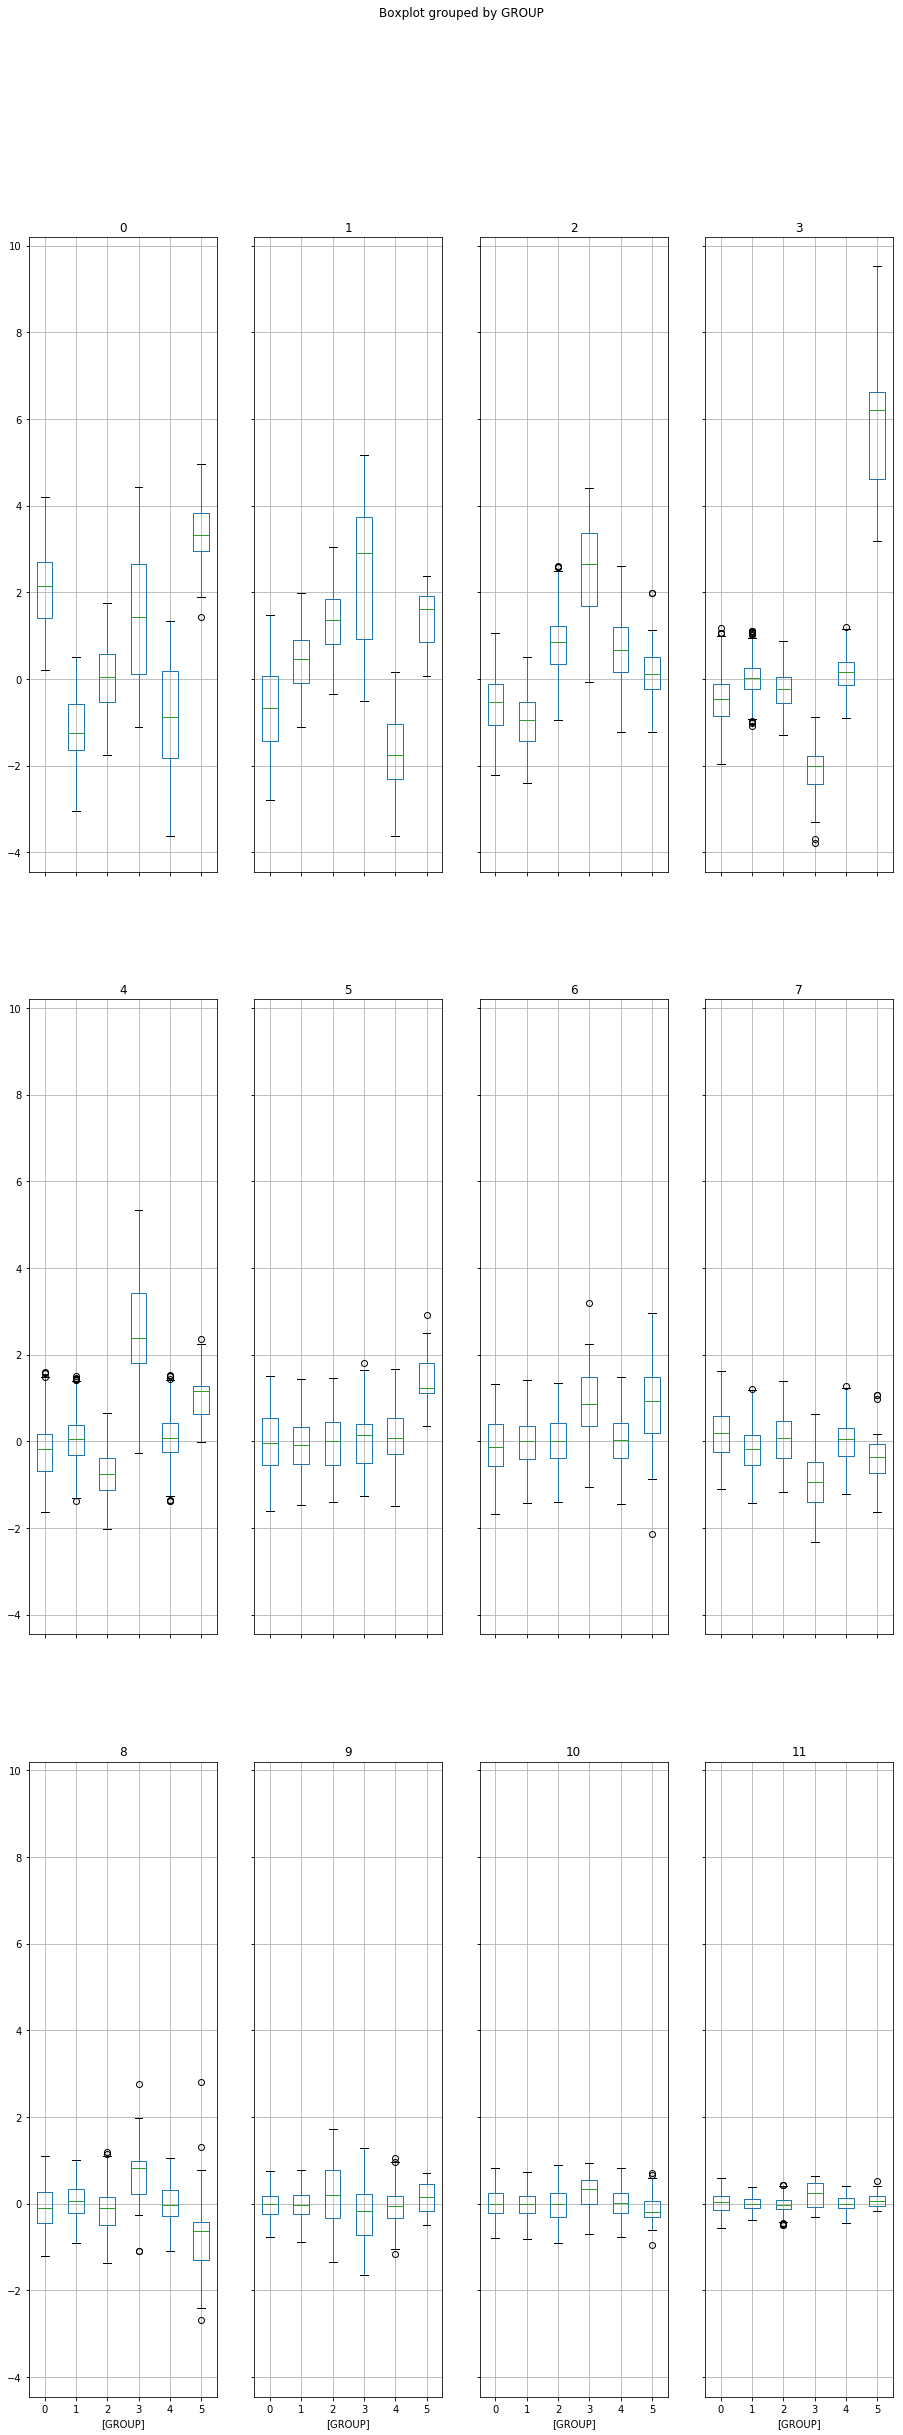

In [28]:
concat_data.boxplot(by = 'GROUP', layout=(3,4), figsize=(15, 40))

### Note: When we remove outliers and replace with median or mean, the distribution shape changes, the standard deviation becomes tighter creating new outliers. The new outliers would be much closer to the centre than original outliers so we accept them without modifying them


In [29]:
wine_data_z.groupby("GROUP").count()

,0,1,2,3,4,5,6,7,8,9,10,11
GROUP,,,,,,,,,,,,
0,347,347,347,347,347,347,347,347,347,347,347,347
1,529,529,529,529,529,529,529,529,529,529,529,529
2,342,342,342,342,342,342,342,342,342,342,342,342
3,34,34,34,34,34,34,34,34,34,34,34,34
4,319,319,319,319,319,319,319,319,319,319,319,319
5,28,28,28,28,28,28,28,28,28,28,28,28
